In [14]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# url del Dataset
url = '../data/processed/dataset_limpio.csv'
df = pd.read_csv(url)

df.head()

,idtabla,agente,supervisor,fecha,paquete,precio_paquete,Tipo,puntos,nombre_agente,nombre_supervisor
0,65956,5945,5468,2025-09-15,DISNEY STANDARD CON ANUNCIOS 60 60,60.0,APLICACION,12.5,SANDRA MICAELA,ESTHER
1,90262,4125,3942,2025-09-12,PLAN AT&T 100 100,100.0,TELEFONIA,25.0,JORGE LUIS,DORA LUZ
2,181595,5872,5720,2025-09-12,DISNEY STANDARD CON ANUNCIOS 60 60,60.0,APLICACION,12.5,MARBELLA,PAULINA
3,189720,6016,5468,2025-09-22,NETFLIX ANUNCIOS 80 80,80.0,APLICACION,12.5,VICTOR,ESTHER
4,197078,6056,3942,2025-09-19,PLAN AT&T 100 100,100.0,TELEFONIA,25.0,CLAUDIA,DORA LUZ


In [15]:
# Volumen de ventas por empleado y por supervisor
# Ventas por agente
ventas_por_agente = df.groupby(['agente', 'nombre_agente'])['puntos'].sum().sort_values(ascending=False)

# Ventas por supervisor
ventas_por_supervisor = df.groupby(['supervisor', 'nombre_supervisor'])['puntos'].sum().sort_values(ascending=False)
ventas_por_supervisor.head()

supervisor  nombre_supervisor
3942        DORA LUZ             50227.5
5468        ESTHER               45227.5
4714        DAVID                44852.5
5720        PAULINA              43950.0
5380        DIANA ILSE           42475.0
Name: puntos, dtype: float64

In [16]:
# Ticket promedio por empleado
ticket_promedio_por_agente = df.groupby(['agente', 'nombre_agente'])['precio_paquete'].mean().sort_values(ascending=False)
ticket_promedio_por_agente.head()

agente  nombre_agente
5468    ESTHER           147.591133
4714    DAVID            146.226415
5380    DIANA ILSE       143.974093
5532    MARIBEL          141.212670
3942    DORA LUZ         134.726141
Name: precio_paquete, dtype: float64

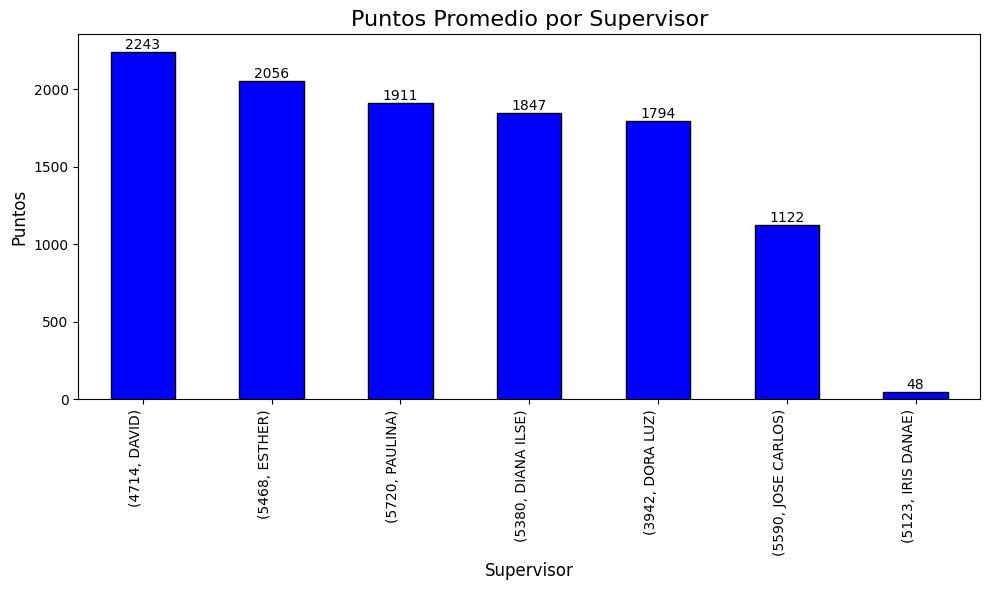

In [28]:
# Comparativo entre equipos
agentes_por_supervisor = df.groupby('nombre_supervisor')['agente'].nunique().sort_values(ascending=False)
puntos_por_equipo = df.groupby(['supervisor','nombre_supervisor'])['puntos'].sum()
puntos_promedio_equipo = (puntos_por_equipo / agentes_por_supervisor).sort_values(ascending=False)
puntos_promedio_equipo.head()

# Grafico comparativo
fig, ax = plt.subplots(figsize=(10,6))
puntos_promedio_equipo.plot(kind='bar', color='blue', edgecolor='black', ax=ax)
plt.title('Puntos Promedio por Supervisor', fontsize=16)
plt.xlabel('Supervisor', fontsize=12)
plt.ylabel('Puntos', fontsize=12)
plt.xticks(rotation=90, ha='right')

for i, val in enumerate(puntos_promedio_equipo):
    ax.text(i, val, f'{val:.0f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()